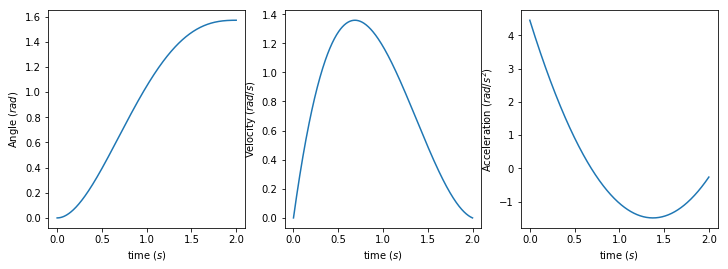

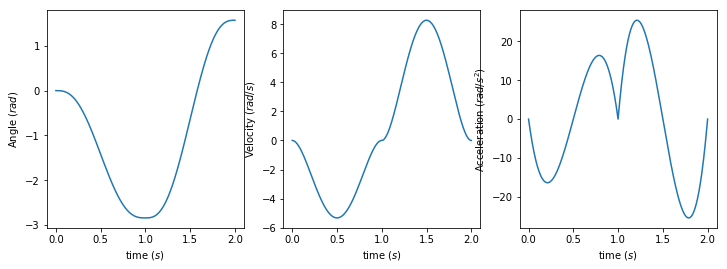

In [30]:
#  Animation didn't work for me in this script, running it in a jupyter notebook worked

from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numpy import sin, cos
from IPython.display import HTML


def forward(t, q1, q2):
    toanimate = np.hstack((q1.reshape(len(q1), 1), q2.reshape(len(q2), 1)))

    l = np.ones((2, 1))

    x1 = l[0] * cos(toanimate[:, 0])
    y1 = l[0] * sin(toanimate[:, 0])

    x2 = l[1] * cos(toanimate[:, 0] + toanimate[:, 1]) + x1
    y2 = l[1] * sin(toanimate[:, 0] + toanimate[:, 1]) + y1

    return toanimate, x1, y1, x2, y2


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (t[i]))
    return line, time_text
# Code above gotten from practical assignments

def QuarticTraj(q0, v0, qf, vf, t0, tf, qvp, tvp):
    """
    # Compute a cubic polynomial reference trajectory
    q0 = initial position
    v0 = initial velocity
    qf = final position
    vf = final velocity
    qvp = via point position
    t0 = initial time
    tvp = via point time
    tf = final time
    """
    from numpy import matrix, array, linspace
    
    M = matrix([[1 , t0 ,   t0**2,   t0 **3,   t0 **4 ],
            [0 ,  1 , 2*t0   , 3*t0 **2, 4*t0 **3 ],
            [1 ,tvp , tvp**2  , tvp**3, tvp**4],
            [1 , tf ,   tf**2,   tf **3,   tf **4 ],
            [0 ,  1 , 2*tf   , 3*tf **2, 4*tf **3 ]])
    
    b = matrix([[q0, v0, qvp, qf, vf]]).T
    coeff = array(M**(-1)*b)
    
    t = linspace(t0, tf, 400, endpoint=True)
    
    angle = coeff[0] + coeff[1]*t + coeff[2]*t**2 + coeff[3]*t**3 + coeff[4]*t**4
    velocity = coeff[1]+ 2*coeff[2]*t + 3*coeff[3]*t**2 + 4*coeff[4]*t**3
    acceleration = 2*coeff[2] + 6*coeff[3]*t + 12*coeff[4]*t**2        
      
    return [t, angle, velocity, acceleration]

def step_alphaf_traj(q0, v0, qf, vf, t0, tf, alpha0, alphaf):
    """
    # Compute a cubic polynomial reference trajectory
    q0 = initial position
    v0 = initial velocity
    qf = final position
    vf = final velocity
    qvp = via point position
    t0 = initial time
    tvp = via point time
    tf = final time
    alphaf= final acc
    """
    from numpy import matrix, array, linspace

    M = matrix([[1, t0, t0 ** 2,  t0 ** 3,      t0 ** 4,     t0**5],
                [0, 1,  2 * t0,   3 * t0 ** 2,  4 * t0 ** 3, 5*t0**4],
                [0, 0,  2,        6*t0,         12*t0**2,    20*t0**3],
                [1, tf,  tf ** 2, tf ** 3,      tf ** 4,     tf**5],
                [0, 1,   2 * tf,  3 * tf ** 2,  4 * tf ** 3, 5*tf**4],
                [0, 0,   2,       6*tf,         12*tf**2,    20*tf**3]])

    b = matrix([[q0, v0, alpha0, qf, vf, alphaf]]).T
    coeff = array(M ** (-1) * b)

    t = linspace(t0, tf, 200, endpoint=True)

    angle = coeff[0] + coeff[1] * t + coeff[2] * t ** 2 + coeff[3] * t ** 3 + coeff[4] * t ** 4 + coeff[5]*t**5
    velocity = coeff[1] + 2 * coeff[2] * t + 3 * coeff[3] * t ** 2 + 4 * coeff[4] * t ** 3 + 5*coeff[5]*t**4
    acceleration = 2 * coeff[2] + 6 * coeff[3] * t + 12 * coeff[4] * t ** 2+ 20*coeff[5]*t**3

    return [t, angle, velocity, acceleration]

# generate trajectories
t1, q1, dq1, ddq1 = QuarticTraj(0, 0, np.pi/2, 0, 0, 2, np.pi/3, 1)

t2, q2, dq2, ddq2 = step_alphaf_traj(0, 0, -np.pi+0.3, 0, 0, 1, 0, 0)
t2_, q2_, dq2_, ddq2_ = step_alphaf_traj(q2[-1], dq2[-1], np.pi / 2, 0, 1, 2, ddq2[-1], 0)

t2, q2, dq2, ddq2 = np.append(t2, t2_), np.append(q2, q2_), np.append(dq2, dq2_), np.append(ddq2, ddq2_)

# plot the results
def PlotTrajectory(t,q,dq,ddq):
    plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.plot(t, q);plt.xlabel('time ($s$)');plt.ylabel('Angle ($rad$)')
    plt.subplot(132)
    plt.plot(t, dq);plt.xlabel('time ($s$)');plt.ylabel('Velocity ($rad/s$)')
    plt.subplot(133)
    plt.plot(t, ddq);plt.xlabel('time ($s$)');plt.ylabel('Acceleration ($rad/s^2$)')
    plt.show()

PlotTrajectory(t1, q1, dq1, ddq1)
PlotTrajectory(t2, q2, dq2, ddq2)

# animate results
toanimate,x1,y1,x2,y2 = forward(t,q1,q2)

fig = plt.figure(figsize=(12, 7.5))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1.5, 2.5), ylim=(-.5, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
plt.plot(1.2, 0.2, 'ro', markersize=20)
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(toanimate)),interval=40, repeat_delay=3e3)
HTML(ani.to_html5_video())
plt.close("all")
HTML(ani.to_jshtml())

# Functies van mitchel voor later maybe
def SexticTraj(q0, v0, a0, qvp, qf, vf, af, t0, tf, tvp):
    """
    Compute a cubic polynomial reference trajectory
    q0 = initial position
    v0 = initial velocity
    qf = final position
    vf = final velocity
    t0 = initial time
    tf = final time
    """
    
    from numpy import matrix, array, linspace
    
    M = matrix([[1,  t0,  t0**2,   t0**3,    t0**4,    t0**5,    t0**6],
                [0,   1,   2*t0, 3*t0**2,  4*t0**3,  5*t0**4,  6*t0**5],
                [0,   0,      2,    6*t0, 12*t0**2, 20*t0**3, 30*t0**4],
                [1, tvp, tvp**2,  tvp**3,   tvp**4,   tvp**5,   tvp**6],
                [1,  tf,  tf**2,   tf**3,    tf**4,    tf**5,    tf**6],
                [0,   1,   2*tf, 3*tf**2,  4*tf**3,  5*tf**4,  6*tf**5],
                [0,   0,      2,    6*tf, 12*tf**2, 20*tf**3, 30*tf**4]])
       
    b = matrix([[q0, v0, a0, qvp, qf, vf, af]]).T
    
    coeff = array(M**(-1)*b)
    print(coeff)
    t = linspace(t0, tf, 200, endpoint=True)
    
    angle =        coeff[0]   + coeff[1]*t   + coeff[2]*t**2    + coeff[3]*t**3   + coeff[4]*t**4 + coeff[5]*t**5 + coeff[6]*t**6
    velocity =     coeff[1]   + 2*coeff[2]*t + 3*coeff[3]*t**2  + 4*coeff[4]*t**3 + 5*coeff[5]*t**4 + 6*coeff[6]*t**5
    acceleration = 2*coeff[2] + 6*coeff[3]*t + 12*coeff[4]*t**2 + 20*coeff[5]*t**3 + 30*coeff[6]*t**4
    return [t, angle, velocity, acceleration]
    
def QuarticTraj(q0, v0, qf, vf, qvp, t0, tf, tvp):
    """
    Compute a cubic polynomial reference trajectory
    q0  = initial position
    v0  = initial velocity
    qf  = final position
    vf  = final velocity
    qvp = via point position
    t0  = initial time
    tf  = final time
    tvp = via point time
    """
    from numpy import matrix, array, linspace
    M = matrix([[1 , t0 ,   t0**2,   t0 **3,   t0 **4 ],
                [0 ,  1 , 2*t0   , 3*t0 **2, 4*t0 **3 ],
                [1 ,tvp , tvp**2  , tvp**3, tvp**4],
                [1 , tf ,   tf**2,   tf **3,   tf **4 ],
                [0 ,  1 , 2*tf   , 3*tf **2, 4*tf **3 ]])
    
    b = matrix([[q0, v0, qvp, qf, vf]]).T
    coeff = array(M**(-1)*b)
    
    t = linspace(t0, tf, 200, endpoint=True)
    
    angle = coeff[0] + coeff[1]*t + coeff[2]*t**2 + coeff[3]*t**3 + coeff[4]*t**4
    velocity = coeff[1]+ 2*coeff[2]*t + 3*coeff[3]*t**2 + 4*coeff[4]*t**3
    acceleration = 2*coeff[2] + 6*coeff[3]*t + 12*coeff[4]*t**2
    
    return [t, angle, velocity, acceleration]


In [28]:
q2.size

400

In [23]:
q1.size

200